# 회원정보 EDA

- 필요한 라이브러리 설치 및 초기 설정

In [1]:
# %pip install -qU numpy pandas matplotlib fastparquet pyarrow seaborn scikit-learn lightgbm

In [2]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 설치된 폰트 목록을 갱신하고, 'NanumGothic' 폰트를 기본 폰트로 설정합니다.
font_path = 'C:/Windows/Fonts/NanumGothic.ttf' 
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

## 데이터 로드

In [3]:
import pandas as pd
import os
from glob import glob

folder_train_path = '../dataset/train/1.회원정보/'
folder_test_path = '../dataset/test/1.회원정보/'

parquet_train_files = glob(os.path.join(folder_train_path, '*.parquet'))
parquet_test_files = glob(os.path.join(folder_test_path, '*.parquet'))

member_df = pd.DataFrame()
member_test_df = pd.DataFrame()

for file in parquet_train_files:
    df = pd.read_parquet(file, engine='fastparquet')
    member_df = pd.concat([member_df, df], ignore_index=True)
    print(f"✅ File: {file} Completed!")

print(f"🔹 Shape : {member_df.shape}")

print("=" * 30)

for file in parquet_test_files:
    df = pd.read_parquet(file, engine='fastparquet')
    member_test_df = pd.concat([member_test_df, df], ignore_index=True)
    print(f"✅ File: {file} Completed!")

print(f"🔹 Shape : {member_test_df.shape}")


✅ File: ../dataset/train/1.회원정보\201807_train_회원정보.parquet Completed!
✅ File: ../dataset/train/1.회원정보\201808_train_회원정보.parquet Completed!
✅ File: ../dataset/train/1.회원정보\201809_train_회원정보.parquet Completed!
✅ File: ../dataset/train/1.회원정보\201810_train_회원정보.parquet Completed!
✅ File: ../dataset/train/1.회원정보\201811_train_회원정보.parquet Completed!
✅ File: ../dataset/train/1.회원정보\201812_train_회원정보.parquet Completed!
🔹 Shape : (2400000, 78)
✅ File: ../dataset/test/1.회원정보\201807_test_회원정보.parquet Completed!
✅ File: ../dataset/test/1.회원정보\201808_test_회원정보.parquet Completed!
✅ File: ../dataset/test/1.회원정보\201809_test_회원정보.parquet Completed!
✅ File: ../dataset/test/1.회원정보\201810_test_회원정보.parquet Completed!
✅ File: ../dataset/test/1.회원정보\201811_test_회원정보.parquet Completed!
✅ File: ../dataset/test/1.회원정보\201812_test_회원정보.parquet Completed!
🔹 Shape : (600000, 77)


# 데이터 전처리


- memory usage를 줄여 메모리가 감당 가능한 데이터로 만들기

In [4]:
# object 타입의 컬럼 확인
object_columns = member_df.select_dtypes(include=['object']).columns.tolist()
object_columns

['ID',
 '연령',
 'Segment',
 '가입통신회사코드',
 '거주시도명',
 '직장시도명',
 '_1순위신용체크구분',
 '_2순위신용체크구분',
 '연회비발생카드수_B0M',
 '상품관련면제카드수_B0M',
 '임직원면제카드수_B0M',
 '우수회원면제카드수_B0M',
 '기타면제카드수_B0M',
 'Life_Stage']

In [5]:
unique_values = {col: member_df[col].unique() for col in object_columns if col != 'ID'}
unique_values

{'연령': array(['40대', '30대', '20대', '60대', '50대', '70대이상'], dtype=object),
 'Segment': array(['D', 'E', 'C', 'A', 'B'], dtype=object),
 '가입통신회사코드': array(['L사', 'K사', 'S사', None], dtype=object),
 '거주시도명': array(['서울', '경기', '부산', '광주', '대전', '전북', '인천', '경남', '충북', '전남', '울산',
        '경북', '강원', '대구', '충남', '제주', '세종'], dtype=object),
 '직장시도명': array(['서울', '경기', '부산', '광주', None, '전북', '인천', '대전', '경남', '충북', '전남',
        '경북', '울산', '강원', '대구', '세종', '충남', '제주'], dtype=object),
 '_1순위신용체크구분': array(['신용', None, '체크'], dtype=object),
 '_2순위신용체크구분': array(['체크', None, '신용'], dtype=object),
 '연회비발생카드수_B0M': array(['0개', '1개이상'], dtype=object),
 '상품관련면제카드수_B0M': array(['0개'], dtype=object),
 '임직원면제카드수_B0M': array(['0개'], dtype=object),
 '우수회원면제카드수_B0M': array(['0개'], dtype=object),
 '기타면제카드수_B0M': array(['0개'], dtype=object),
 'Life_Stage': array(['자녀성장(2)', '자녀성장(1)', '자녀출산기', '독신', '노년생활', '가족구축기', '자녀독립기'],
       dtype=object)}

- `상품관련면제카드수_B0M`, `임직원면제카드수_B0M`, `우수회원면제카드수_B0M`, `기타면제카드수_B0M`
    - unique 값이 모두 0개만 존재하므로 의미없는 column으로 결론

- `가입통신회사코드`, `직장시도명`, `_1순위신용체크구분`, `_2순위신용체크구분`에 대해서는 결측치 처리 필요

In [6]:
drop_columns = [
    '상품관련면제카드수_B0M', '임직원면제카드수_B0M', 
    '우수회원면제카드수_B0M', '기타면제카드수_B0M'
]

member_df.drop(columns=drop_columns, inplace=True)
member_test_df.drop(columns=drop_columns, inplace=True)

In [7]:
fillna_columns = [
    '가입통신회사코드', '직장시도명', '_1순위신용체크구분', '_2순위신용체크구분',
]

for col in fillna_columns:
    member_df[col] = member_df[col].fillna('Unknown')
    member_test_df[col] = member_test_df[col].fillna('Unknown')

In [8]:
# object_columns에서 drop_columns에 포함된 컬럼을 제외한 나머지 컬럼을 선택
object_columns = [col for col in object_columns if col not in drop_columns]

for col in object_columns:
    if col in member_test_df.columns:
        member_df[col] = member_df[col].astype('category')
        member_test_df[col] = member_test_df[col].astype('category')
    else:
        member_df[col] = member_df[col].astype('category')

- 수치형 컬럼 확인

In [9]:
int64_columns = member_df.select_dtypes(include=['int64']).columns.tolist()
int64_columns

['기준년월',
 '남녀구분코드',
 '회원여부_이용가능',
 '회원여부_이용가능_CA',
 '회원여부_이용가능_카드론',
 '소지여부_신용',
 '소지카드수_유효_신용',
 '소지카드수_이용가능_신용',
 '입회일자_신용',
 '입회경과개월수_신용',
 '회원여부_연체',
 '이용거절여부_카드론',
 '동의여부_한도증액안내',
 '수신거부여부_TM',
 '수신거부여부_DM',
 '수신거부여부_메일',
 '수신거부여부_SMS',
 '탈회횟수_누적',
 '최종탈회후경과월',
 '탈회횟수_발급6개월이내',
 '탈회횟수_발급1년이내',
 '마케팅동의여부',
 '유효카드수_신용체크',
 '유효카드수_신용',
 '유효카드수_신용_가족',
 '유효카드수_체크',
 '유효카드수_체크_가족',
 '이용가능카드수_신용체크',
 '이용가능카드수_신용',
 '이용가능카드수_신용_가족',
 '이용가능카드수_체크',
 '이용가능카드수_체크_가족',
 '이용카드수_신용체크',
 '이용카드수_신용',
 '이용카드수_신용_가족',
 '이용카드수_체크',
 '이용카드수_체크_가족',
 '이용금액_R3M_신용체크',
 '이용금액_R3M_신용',
 '이용금액_R3M_신용_가족',
 '이용금액_R3M_체크',
 '이용금액_R3M_체크_가족',
 '_1순위카드이용금액',
 '_1순위카드이용건수',
 '_2순위카드이용금액',
 '_2순위카드이용건수',
 '보유여부_해외겸용_본인',
 '이용가능여부_해외겸용_본인',
 '이용여부_3M_해외겸용_본인',
 '보유여부_해외겸용_신용_본인',
 '이용가능여부_해외겸용_신용_본인',
 '이용여부_3M_해외겸용_신용_본인',
 '연회비할인카드수_B0M',
 '기본연회비_B0M',
 '제휴연회비_B0M',
 '할인금액_기본연회비_B0M',
 '할인금액_제휴연회비_B0M',
 '청구금액_기본연회비_B0M',
 '청구금액_제휴연회비_B0M',
 '카드신청건수',
 '최종카드발급경과월']

In [10]:
int_unique_values = {col: member_df[col].unique() for col in int64_columns}
int_unique_values

{'기준년월': array([201807, 201808, 201809, 201810, 201811, 201812]),
 '남녀구분코드': array([2, 1]),
 '회원여부_이용가능': array([1, 0]),
 '회원여부_이용가능_CA': array([1, 0]),
 '회원여부_이용가능_카드론': array([0, 1]),
 '소지여부_신용': array([1, 0]),
 '소지카드수_유효_신용': array([1, 2, 3, 0, 4]),
 '소지카드수_이용가능_신용': array([1, 2, 3, 0]),
 '입회일자_신용': array([20130101, 20170801, 20080401, 20160501, 20180601, 20141001,
        20081001, 20070301, 20121001, 20161201, 20080801, 20151001,
        20170301, 20150701, 20170601, 20070901, 20180201, 20080601,
        20111001, 20140801, 20120401, 20170201, 20160901, 20120201,
        19990901, 20140501, 20100101, 20150201, 20170501, 20110601,
        20070701, 19970101, 19990501, 20141201, 20060701, 20030601,
        20061201, 20090901, 20060601, 19951101, 20060201, 20001101,
        20030901, 20170401, 20140701, 20000401, 20160701, 19991001,
        20161001, 20180301, 20120701, 20180101, 20130601, 20150101,
        20121201, 20111201, 19930601, 19940601, 20110701, 20120901,
        20080901,

In [11]:
# 0만 존재하는 컬럼 삭제
drop_cols = ['연회비할인카드수_B0M', '할인금액_기본연회비_B0M', '할인금액_제휴연회비_B0M', '이용금액_R3M_체크_가족']
member_df = member_df.drop(columns=drop_cols)
member_test_df = member_test_df.drop(columns=drop_cols)

In [12]:
float_unique_values = {col: member_df[col].unique() for col in member_df.select_dtypes(include=['float64']).columns.tolist()}
float_unique_values

{'최종유효년월_신용_이용가능': array([202110., 202112., 202111., 202201., 202002., 202211., 202107.,
        202209.,     nan, 202001., 202204., 202308., 202301., 202009.,
        202108., 202212., 202102., 202109., 202206., 201911., 202012.,
        202207., 202101., 202005., 202104., 202202., 201912., 202205.,
        202103., 202302., 202305., 202208., 201908., 202310., 202203.,
        202106., 202007., 202312., 201905., 202304., 201903., 201910.,
        202303., 202011., 201909., 202306., 202105., 201906., 202008.,
        202307., 202311., 201907., 202010., 202210., 202006., 201904.,
        202309., 202004., 202003., 201812., 201901., 201902., 201811.,
        201810., 201809., 201808., 201806., 201807., 201805., 202401.,
        202403., 202402., 202404., 202405., 202406.]),
 '최종유효년월_신용_이용': array([202112., 202204., 202201., 202111.,     nan, 202209., 202106.,
        202208., 202003., 202205., 202303., 202212., 202011., 202110.,
        202211., 202104., 202304., 202302., 202206., 201912

In [13]:
import numpy as np

def optimize_numeric_types(df, verbose=True):
    """
    DataFrame의 수치형(int, float) 컬럼을 숫자 범위에 맞춰 다운캐스팅하여 메모리를 최적화
    
    Parameters:
    - df (pd.DataFrame): 입력 데이터프레임
    - verbose (bool): 최적화 전후 메모리 사용량 출력 여부

    Returns:
    - pd.DataFrame: 최적화된 데이터프레임
    """
    start_mem = df.memory_usage(deep=True).sum() / 1024**2 # MB단위로 변환
    
    for col in df.select_dtypes(include=['int', 'float']).columns:
        col_type = df[col].dtypes
        
        if np.issubdtype(col_type, np.integer):
            c_min = df[col].min()
            c_max = df[col].max()
            
            if c_min >= 0:
                if c_max < np.iinfo(np.uint8).max:
                    df[col] = df[col].astype(np.uint8)
                elif c_max < np.iinfo(np.uint16).max:
                    df[col] = df[col].astype(np.uint16)
                elif c_max < np.iinfo(np.uint32).max:
                    df[col] = df[col].astype(np.uint32)
                else:
                    df[col] = df[col].astype(np.uint64)
            else:
                if np.iinfo(np.int8).min <= c_min and c_max <= np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif np.iinfo(np.int16).min <= c_min and c_max <= np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif np.iinfo(np.int32).min <= c_min and c_max <= np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                else:
                    df[col] = df[col].astype(np.int64)
                    
        elif np.issubdtype(col_type, np.floating):
            c_min = df[col].min()
            c_max = df[col].max()
            
            if np.finfo(np.float16).min <= c_min and c_max <= np.finfo(np.float16).max:
                df[col] = df[col].astype(np.float16)
            elif np.finfo(np.float32).min <= c_min and c_max <= np.finfo(np.float32).max:
                df[col] = df[col].astype(np.float32)
            else:
                df[col] = df[col].astype(np.float64)
    
    end_mem = df.memory_usage(deep=True).sum() / 1024**2
    
    if verbose:
        print(f"🔹 메모리 사용량: {start_mem:.2f} MB → {end_mem:.2f} MB  ({100*(start_mem-end_mem)/start_mem:.1f}% 감소)")
    
    return df

In [14]:
member_df = optimize_numeric_types(member_df)
member_test_df = optimize_numeric_types(member_test_df)

🔹 메모리 사용량: 1162.78 MB → 283.87 MB  (75.6% 감소)
🔹 메모리 사용량: 289.94 MB → 70.21 MB  (75.8% 감소)


# Segment 분포 확인

Segment
A        972
B        144
C     127590
D     349242
E    1922052
Name: count, dtype: int64
Segment
A    0.000405
B    0.000060
C    0.053163
D    0.145517
E    0.800855
Name: proportion, dtype: float64


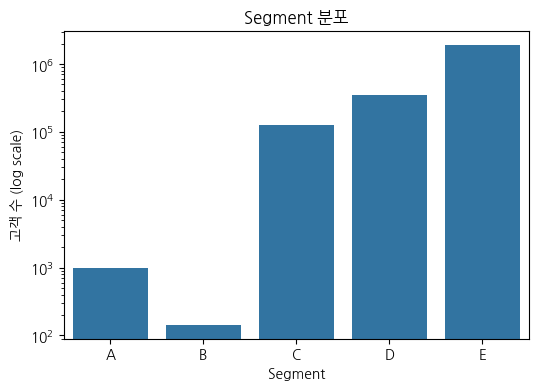

In [15]:
segment_count = member_df['Segment'].value_counts().sort_index()
print(segment_count)
print("=" * 30)

segment_ratio = member_df["Segment"].value_counts(normalize=True).sort_index()
print(segment_ratio)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.barplot(x=segment_count.index, y=segment_count.values)
plt.yscale("log")
plt.title("Segment 분포")
plt.ylabel("고객 수 (log scale)")
plt.xlabel("Segment")
plt.show()

### 🔍 분석
- 극심한 클래스 불균형이 존재함.
  - Segment E 하나가 전체 고객의 80% 이상 차지
  - Segment A, B는 희소 클래스 (합쳐도 전체의 0.05% 수준)
  - 로그 스케일로 표현했기 때문에 A/B가 보이지만, 실제로는 거의 사라지는 수준

- A, B 세그먼트는 중요한 VIP 혹은 고위험군 고객을 분류하는 세그먼트일 가능성이 높다.

> 👉 모델 학습 시 Segment A와 B를 예측하는 것이 매우 어려우며, 모델이 Segment E에 편향될 위험이 큼. 모델링 시 소수 클래스 예측을 위한 특수한 처리가 필수

# Feature Selection

## Feature Importance
- LightGBM을 이용하여 Feature Importance를 확인
    - 데이터가 크고 Feature가 많기 때문에, 이런 환경에서 유리한 LightGBM 사용

In [16]:
import lightgbm as lgb

def get_feature_importance(X, y, importance_type='gain', plot_top_n=30):
    """
    LightGBM을 이용해 Feature Importance를 계산하고, 상위 feature를 시각화합니다.
    
    Parameters:
    - X (pd.DataFrame): feature 데이터
    - y (pd.Series or np.array): target 데이터
    - importance_type (str): 'gain' 또는 'split' (중요도 기준)
    - plot_top_n (int): 중요도가 높은 feature 몇 개를 plot할지
    - random_state (int): seed 고정

    Returns:
    - feature_importance_df (pd.DataFrame): feature importance 데이터프레임
    - model (lgb.Booster): 학습된 LightGBM 모델
    """

    # LightGBM 데이터셋 구성
    lgb_train = lgb.Dataset(X, label=y)

    # LightGBM 기본 파라미터 (가볍게 학습)
    params = {
        'objective': 'multiclass',   # 다중 클래스 분류
        'num_class': 5,  # 클래스 수 자동 지정
        'boosting_type': 'gbdt',
        'metric': 'multi_logloss',   # 다중 클래스 로지 손실
        'verbosity': -1,
        'seed': 42,
        'learning_rate': 0.05,
        'num_leaves': 31,
        'min_data_in_leaf': 20
    }

    # 빠르게 학습 (에포크 100회로 제한)
    model = lgb.train(params, lgb_train, num_boost_round=100)

    # Feature Importance 가져오기
    importance = model.feature_importance(importance_type=importance_type)
    feature_names = X.columns

    feature_importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': importance
    }).sort_values('importance', ascending=False)

    # 시각화
    top_features = feature_importance_df.head(plot_top_n)
    
    plt.figure(figsize=(10, max(6, plot_top_n // 2)))
    plt.barh(top_features['feature'][::-1], top_features['importance'][::-1])
    plt.xlabel('Importance')
    plt.title(f'Top {plot_top_n} Feature Importance ({importance_type})')
    plt.tight_layout()
    plt.show()

    return feature_importance_df, model


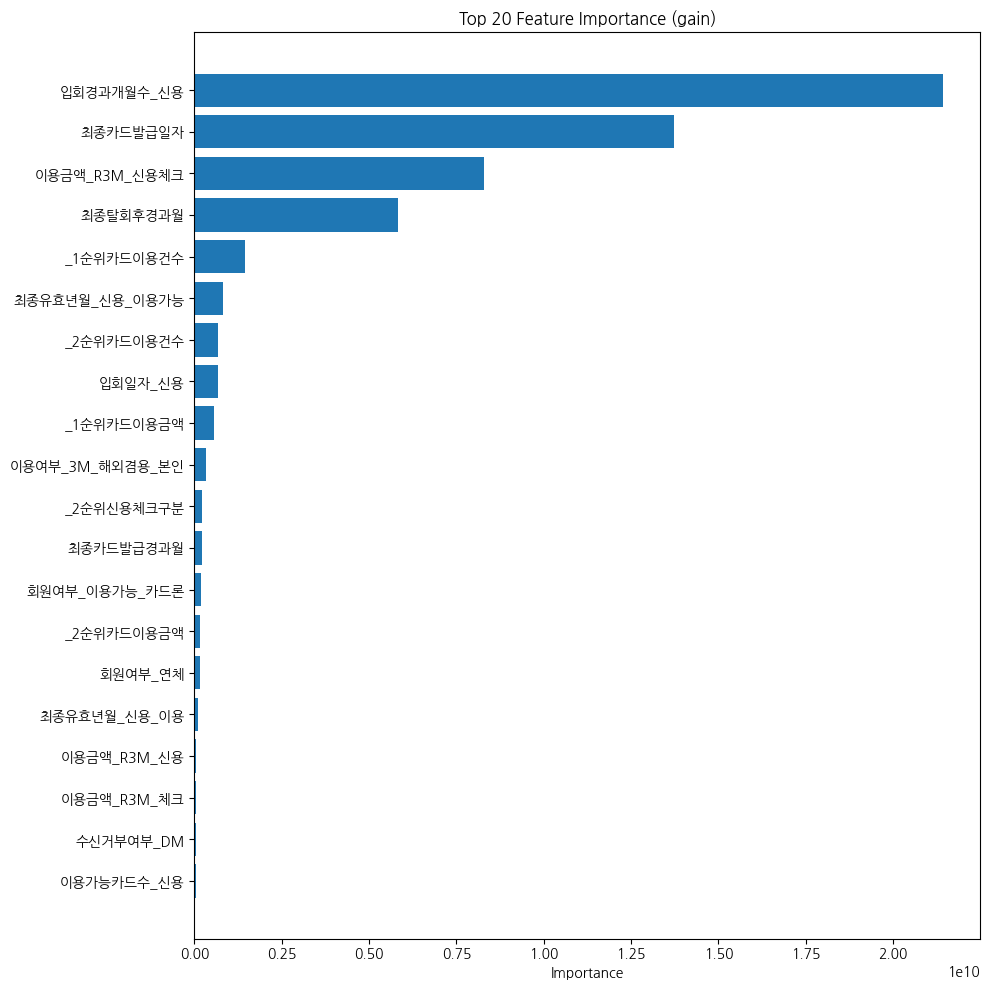

In [17]:
X = member_df.drop(columns=['ID', 'Segment'])

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(member_df['Segment'])

importance_df, model = get_feature_importance(X, y, importance_type='gain', plot_top_n=20)

## 🔍 분석
### **1. 입회경과개월수_신용 (가장 높은 중요도)**
- Segment 분류에서 가장 핵심적인 변수
- 카드에 가입한 지 얼마나 오래되었는지(즉, 고객의 누적 이용 경험/관계 기간)가 Segment를 구분하는 데 가장 큰 영향을 준다는 뜻.

### **2.최종카드발급경과월, 이용금액_R3M_신용체크, 최종탈회후경과월**
- Segment가 고객의 최신 활동을 반영한다는 의미

### **3._1순위카드이용건수, _2순위카드이용건수, _1순위카드이용금액, _2순위카드이용금액**
- 우선순위 카드의 사용 정보
- 고객의 카드 이용량이 Segment 분류에 중요한 힌트라는 의미


# Correlation 분석

- 상위 30% feature를 추출하고 상관관계를 분석하여 중복되는 feature를 제거

In [18]:
def select_top_features(importance_df, X, top_percent=0.3):
    """
    중요도 데이터프레임에서 상위 top_percent 비율만큼 feature를 선택하여 데이터셋 추출

    Parameters:
    - importance_df (pd.DataFrame): feature와 importance를 가진 데이터프레임
    - X (pd.DataFrame): 원본 feature 데이터셋
    - top_percent (float): 상위 몇 %를 선택할지 (기본 30%)

    Returns:
    - X_top (pd.DataFrame): 상위 feature만 선택된 데이터프레임
    - selected_features (list): 선택된 feature 리스트
    """
    n_features = int(len(importance_df) * top_percent)
    selected_features = importance_df['feature'].iloc[:n_features].tolist()
    X_top = X[selected_features]
    return X_top, selected_features

In [19]:
X_top, selected_features = select_top_features(importance_df, X, top_percent=0.3)
print(f"🔹 선택된 feature 수: {len(selected_features)}")
print(f"🔹 선택된 feature: {selected_features}")

🔹 선택된 feature 수: 20
🔹 선택된 feature: ['입회경과개월수_신용', '최종카드발급일자', '이용금액_R3M_신용체크', '최종탈회후경과월', '_1순위카드이용건수', '최종유효년월_신용_이용가능', '_2순위카드이용건수', '입회일자_신용', '_1순위카드이용금액', '이용여부_3M_해외겸용_본인', '_2순위신용체크구분', '최종카드발급경과월', '회원여부_이용가능_카드론', '_2순위카드이용금액', '회원여부_연체', '최종유효년월_신용_이용', '이용금액_R3M_신용', '이용금액_R3M_체크', '수신거부여부_DM', '이용가능카드수_신용']


In [20]:
def plot_feature_correlation(X_top, threshold=0.8):
    """
    상위 feature들 간의 상관계수 행렬을 시각화하고, 
    threshold 이상인 feature쌍을 출력

    Parameters:
    - X_top (pd.DataFrame): 상위 feature 데이터프레임
    - threshold (float): 높은 상관관계로 간주할 기준
    """
    # 수치치형 feature만 선택
    numeric_features = X_top.select_dtypes(include=['int', 'float'])
    corr_matrix = numeric_features.corr()

    # 상관관계 히트맵 그리기
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Matrix of Top Features')
    plt.show()

    # threshold 이상인 feature 쌍 출력
    high_corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

    if high_corr_pairs:
        print(f"\n상관계수 {threshold} 이상인 feature 쌍:")
        for f1, f2, corr in sorted(high_corr_pairs, key=lambda x: -abs(x[2])):
            print(f"🔹{f1} vs {f2}: 상관계수 = {corr:.3f}")
    else:
        print(f"\n상관계수 {threshold} 이상인 feature 쌍이 없습니다.")

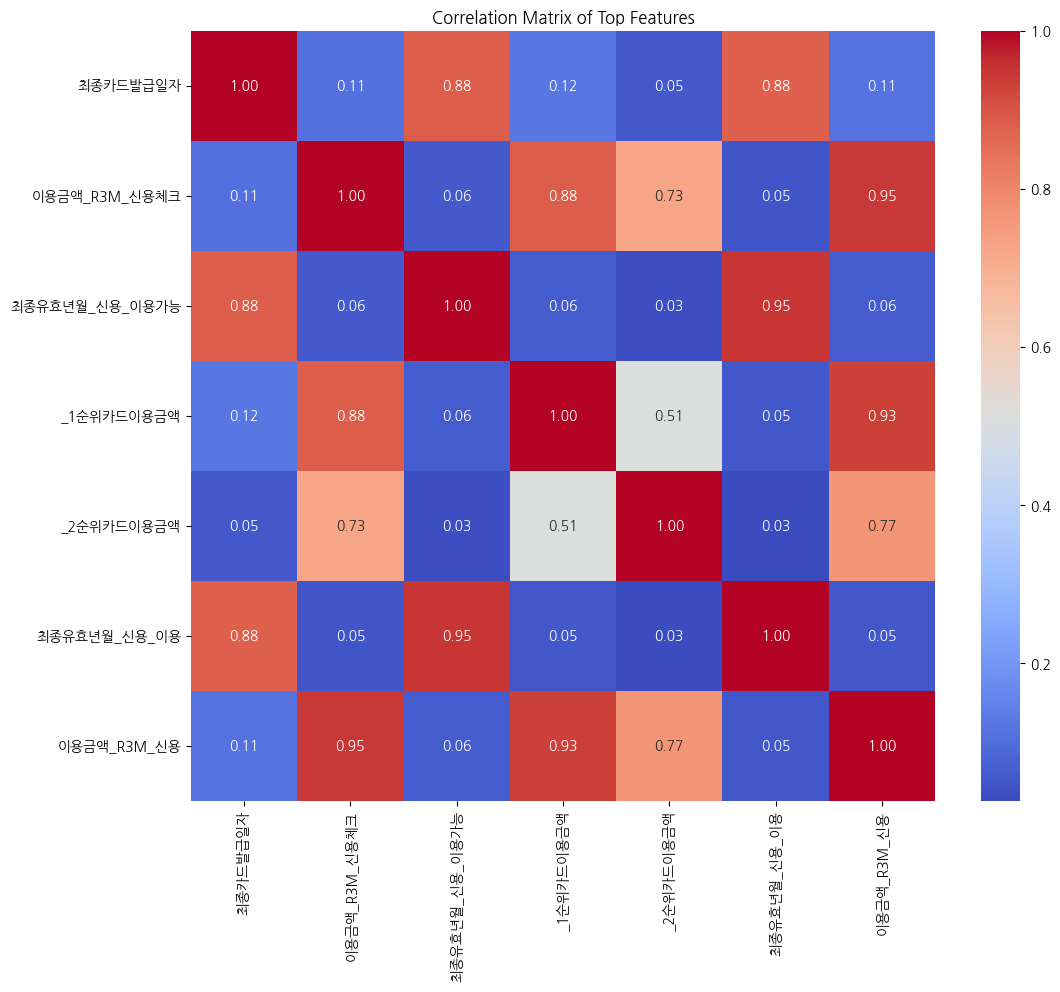


상관계수 0.8 이상인 feature 쌍:
🔹최종유효년월_신용_이용 vs 최종유효년월_신용_이용가능: 상관계수 = 0.950
🔹이용금액_R3M_신용 vs 이용금액_R3M_신용체크: 상관계수 = 0.946
🔹이용금액_R3M_신용 vs _1순위카드이용금액: 상관계수 = 0.934
🔹_1순위카드이용금액 vs 이용금액_R3M_신용체크: 상관계수 = 0.884
🔹최종유효년월_신용_이용가능 vs 최종카드발급일자: 상관계수 = 0.883
🔹최종유효년월_신용_이용 vs 최종카드발급일자: 상관계수 = 0.878


In [21]:
# 상관계수 0.8 이상인 feature 쌍을 시각화
plot_feature_correlation(X_top, threshold=0.8)

- 상관계수가 0.9 이상인 feature는 중복됨으로 간주하고 이를 최소화
- 학습 데이터를 Train/Validation으로 나눔

In [22]:
from sklearn.model_selection import train_test_split

# 1. Feature Importance, Correlation 기반 제거할 Feature 리스트
features_to_drop = [
    '최종유효년월_신용_이용',
    '_1순위카드이용금액',
    '이용금액_R3M_신용체크'
]

# 2. 상위 Feature 데이터셋(X_top)에서 제거
X_reduced = X_top.drop(columns=features_to_drop)

# 4. Train/Validation 데이터 분리
# stratify=y로 클래스 불균형을 고려해서 층화 샘플링(stratified split)한다
X_train, X_val, y_train, y_val = train_test_split(
    X_reduced,
    y,
    test_size=0.2,        # 20%를 validation에 사용
    random_state=42,      # seed 고정
    stratify=y            # target 비율 유지
)

In [23]:
from sklearn.metrics import f1_score, classification_report

classes = np.unique(y_train)

# 2. LightGBM 학습 파라미터 설정
params = {
    'objective': 'multiclass',
    'num_class': len(classes),
    'boosting_type': 'gbdt',
    'metric': 'multi_logloss',   # 내부 로스
    'learning_rate': 0.05,
    'verbosity': -1,
    'seed': 42,
    'is_unbalance': True,  # 데이터셋 불균형 자동 고려
}

# 3. LightGBM Dataset 구성
lgb_train = lgb.Dataset(X_train, label=y_train)
lgb_val = lgb.Dataset(X_val, label=y_val)

# 4. 학습
model = lgb.train(
    params,
    lgb_train,
    num_boost_round=1000,
    valid_sets=[lgb_train, lgb_val],
    valid_names=['train', 'valid'],
)

# 5. 예측
y_pred = model.predict(X_val)
y_pred_labels = np.argmax(y_pred, axis=1)

# 6. 평가
f1 = f1_score(y_val, y_pred_labels, average='macro')
print(f"Validation Macro F1-Score: {f1:.4f}")

# 7. 클래스별 상세 리포트
print("\nClassification Report:")
print(classification_report(y_val, y_pred_labels, digits=4))

Validation Macro F1-Score: 0.4802

Classification Report:
              precision    recall  f1-score   support

           0     0.1983    0.3711    0.2585       194
           1     0.3750    0.1034    0.1622        29
           2     0.6759    0.4335    0.5283     25518
           3     0.5974    0.4622    0.5212     69848
           4     0.9026    0.9609    0.9309    384411

    accuracy                         0.8600    480000
   macro avg     0.5499    0.4662    0.4802    480000
weighted avg     0.8459    0.8600    0.8495    480000



# 데이터 저장

In [24]:
# ID, Segment, X_reduced.columns 컬럼으로 구성된 데이터프레임 생성
member_reduced = member_df[['ID', 'Segment', '기준년월'] + X_reduced.columns.tolist()]
member_test_reduced = member_test_df[['ID', '기준년월'] + X_reduced.columns.tolist()]

# 데이터프레임 저장
member_reduced.to_parquet('../dataset/train/member.parquet', index=False)
member_test_reduced.to_parquet('../dataset/test/member.parquet', index=False)
print("✅ 데이터셋 저장 완료!")

✅ 데이터셋 저장 완료!
